In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [12]:
def abrir_csv(path, **kwargs):
    data = pd.read_csv(path)
    return data

In [13]:
path = "post_pandemic_remote_work_health_impact_2025.csv"
data = abrir_csv(path)
data.head(10)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,Female,South America,Technology,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Female,Asia,Finance,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


In [14]:
print(data.columns)

#eliminamos duplicados
data = data.drop_duplicates()

#eliminamos none
data = data.dropna()

#vemos los datos totales
print(len(data))

Index(['Survey_Date', 'Age', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Hours_Per_Week', 'Mental_Health_Status',
       'Burnout_Level', 'Work_Life_Balance_Score', 'Physical_Health_Issues',
       'Social_Isolation_Score', 'Salary_Range'],
      dtype='object')
2150


In [15]:
traducimos_columnas = {
'Survey_Date': 'Fecha_de_encuesta',
'Age': 'Edad',
'Gender': 'Género',
'Region': 'Región',
'Industry': 'Industria',
'Job_Role': 'Rol_laboral',
'Work_Arrangement': 'Ubicación_de_trabajo',
'Hours_Per_Week': 'Horas_por_semana',
'Mental_Health_Status': 'Estado_de_salud_mental',
'Burnout_Level': 'Nivel_de_agotamiento',
'Work_Life_Balance_Score': 'Equilibrio_entre_vida_laboral_y_personal',
'Physical_Health_Issues': 'Problemas_de_salud_físico',
'Social_Isolation_Score': 'Puntuación_de_aislamiento_social',
'Salary_Range': 'Rango_salarial',

}
data.rename(columns=traducimos_columnas,inplace=True)

print(data.columns)

Index(['Fecha_de_encuesta', 'Edad', 'Género', 'Región', 'Industria',
       'Rol_laboral', 'Ubicación_de_trabajo', 'Horas_por_semana',
       'Estado_de_salud_mental', 'Nivel_de_agotamiento',
       'Equilibrio_entre_vida_laboral_y_personal', 'Problemas_de_salud_físico',
       'Puntuación_de_aislamiento_social', 'Rango_salarial'],
      dtype='object')


In [16]:
# Eliminar columnas que no aportan al análisis
data.drop(['Género', 'Industria'], axis=1, inplace=True)
data.head(10)

,Fecha_de_encuesta,Edad,Región,Rol_laboral,Ubicación_de_trabajo,Horas_por_semana,Estado_de_salud_mental,Nivel_de_agotamiento,Equilibrio_entre_vida_laboral_y_personal,Problemas_de_salud_físico,Puntuación_de_aislamiento_social,Rango_salarial
0,2025-06-01,27,Asia,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Asia,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Africa,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Europe,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
5,2025-06-01,52,Oceania,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
8,2025-06-01,30,South America,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Asia,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K
11,2025-06-01,64,North America,Business Analyst,Remote,35,ADHD,Medium,3,Eye Strain; Wrist Pain,4,$40K-60K
12,2025-06-01,25,Oceania,Data Scientist,Hybrid,57,Burnout,High,2,Back Pain; Eye Strain,1,$80K-100K
13,2025-06-01,37,Europe,UX Designer,Remote,59,Anxiety,High,5,Back Pain; Shoulder Pain; Wrist Pain,5,$60K-80K


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2150 entries, 0 to 3156
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha_de_encuesta                         2150 non-null   object
 1   Edad                                      2150 non-null   int64 
 2   Región                                    2150 non-null   object
 3   Rol_laboral                               2150 non-null   object
 4   Ubicación_de_trabajo                      2150 non-null   object
 5   Horas_por_semana                          2150 non-null   int64 
 6   Estado_de_salud_mental                    2150 non-null   object
 7   Nivel_de_agotamiento                      2150 non-null   object
 8   Equilibrio_entre_vida_laboral_y_personal  2150 non-null   int64 
 9   Problemas_de_salud_físico                 2150 non-null   object
 10  Puntuación_de_aislamiento_social          2150 non-nu

In [21]:

for col in ["Puntuación_de_aislamiento_social", "Equilibrio_entre_vida_laboral_y_personal", "Horas_por_semana"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

mapeo_burnout = {
    'Low': 'Bajo',
    'Medium': 'Medio', 
    'High': 'Alto'
}
data['Nivel_de_agotamiento'] = data['Nivel_de_agotamiento'].replace(mapeo_burnout)

mapeo_modalidad = {
    'Hybrid': 'Híbrido',
    'Onsite': 'Presencial', 
    'Remote': 'Remoto'
}
data['Ubicación_de_trabajo'] = data['Ubicación_de_trabajo'].replace(mapeo_modalidad)

tabla_medias = (
    data
    .groupby("Ubicación_de_trabajo")[["Puntuación_de_aislamiento_social",
                                    "Equilibrio_entre_vida_laboral_y_personal",
                                    "Horas_por_semana"]]
    .mean()
    .rename(columns={
        "Puntuación_de_aislamiento_social": "Aislamiento_promedio",
        "Equilibrio_entre_vida_laboral_y_personal": "Equilibrio_vida_promedio",
        "Horas_por_semana": "Horas_semana_promedio"
    })
    .round(2)
)
tabla_burnout = (data.groupby(["Ubicación_de_trabajo", "Nivel_de_agotamiento"]).size()
.unstack(fill_value=0))

if set(["Bajo", "Medio", "Alto"]).issubset(tabla_burnout.columns):
    tabla_burnout = tabla_burnout[["Bajo", "Medio", "Alto"]]

tabla_burnout_pct = (tabla_burnout.div(tabla_burnout.sum(axis=1), axis=0) * 100).round(1)

final = pd.concat([tabla_medias, tabla_burnout_pct],
axis=1,keys=["Promedios", "Burnout (%)"])

final.index.name = "Modalidad_de_trabajo"

final

Promedios                           \
                     Aislamiento_promedio Equilibrio_vida_promedio   
Modalidad_de_trabajo                                                 
Híbrido                              2.75                     2.93   
Presencial                           2.37                     3.05   
Remoto                               3.54                     2.97   

                                           Burnout (%)              
                     Horas_semana_promedio        Bajo Medio  Alto  
Modalidad_de_trabajo                                                
Híbrido                              49.65        19.9  44.9  35.1  
Presencial                           50.01        30.3  43.4  26.3  
Remoto                               49.59        13.8  39.5  46.7

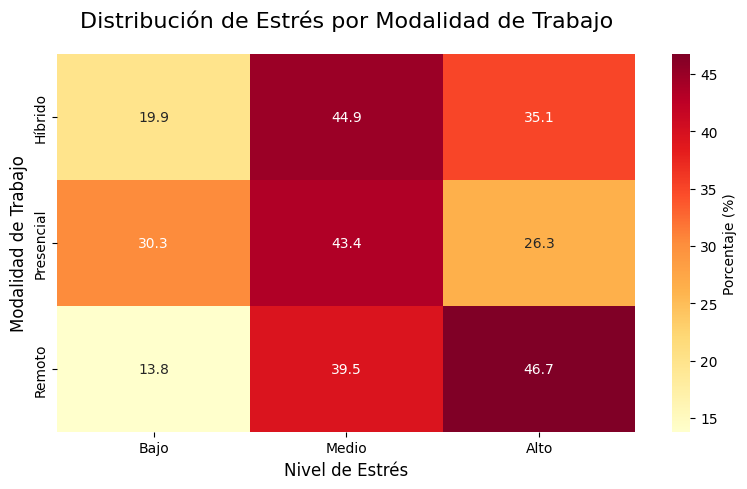

In [25]:
# extraer solo las columnas de burnout
tabla_burnout_pct = final["Burnout (%)"]

plt.figure(figsize=(8,5))
sns.heatmap(
    tabla_burnout_pct,
    annot=True, fmt=".1f", cmap="YlOrRd",
    cbar_kws={'label': 'Porcentaje (%)'}
)

plt.title("Distribución de Estrés por Modalidad de Trabajo", fontsize=16, pad=20)
plt.xlabel("Nivel de Estrés", fontsize=12)
plt.ylabel("Modalidad de Trabajo", fontsize=12)
plt.tight_layout()
plt.show()

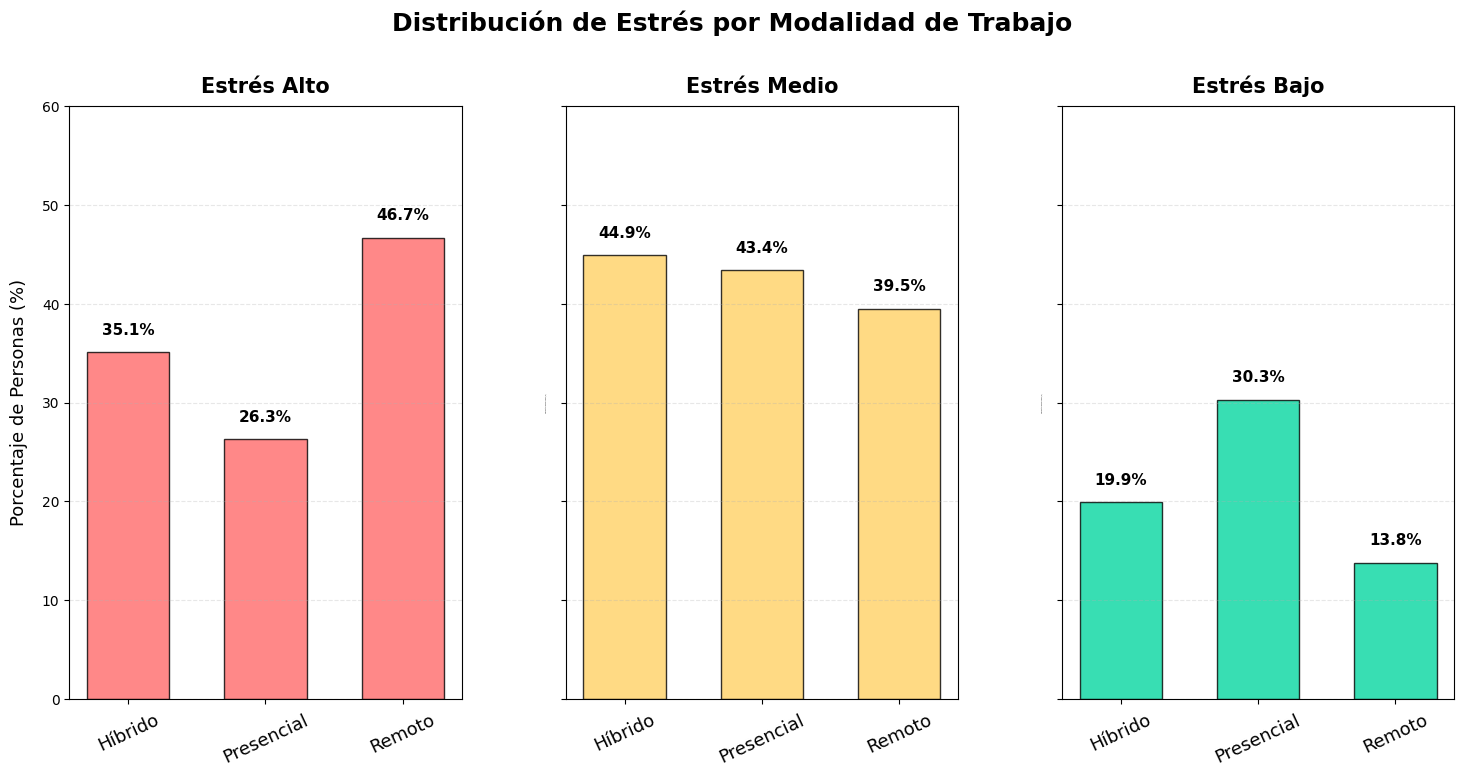

In [26]:
tabla_estres_pct = final["Burnout (%)"]
fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
niveles_estres = ['Alto', 'Medio', 'Bajo']
colores = ['#FF6B6B', '#FFD166', '#06D6A0']  # Colores diferentes: rojo, amarillo, verde
for i, (nivel, color_actual) in enumerate(zip(niveles_estres, colores)):
    ax = axes[i]
    datos_nivel = tabla_estres_pct[nivel]

    barras = ax.bar(datos_nivel.index, datos_nivel.values,
                    color=color_actual, width=0.6, alpha=0.8,
                    edgecolor='black', linewidth=1)

    ax.set_title(f'Estrés {nivel}', fontsize=15, pad=10, fontweight='bold')
    ax.set_ylabel('Porcentaje de Personas (%)', fontsize=13 if i == 0 else 0, labelpad=10)
    ax.set_ylim(0, 60)
    ax.tick_params(axis='x', rotation=25, labelsize=13, pad=5)
    
    # Añadir grid
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    for b in barras:
        h = b.get_height()
        ax.text(b.get_x() + b.get_width()/2,
                h + 1.5, f'{h:.1f}%', ha='center', va='bottom', 
                fontsize=11, fontweight='bold')

plt.suptitle('Distribución de Estrés por Modalidad de Trabajo', fontsize=18, fontweight='bold')
plt.tight_layout(pad=2, w_pad=6)
plt.show()

C:\Users\nfhs\AppData\Local\Temp\ipykernel_10744\1242937369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Ubicación_de_trabajo', y='Horas_por_semana',


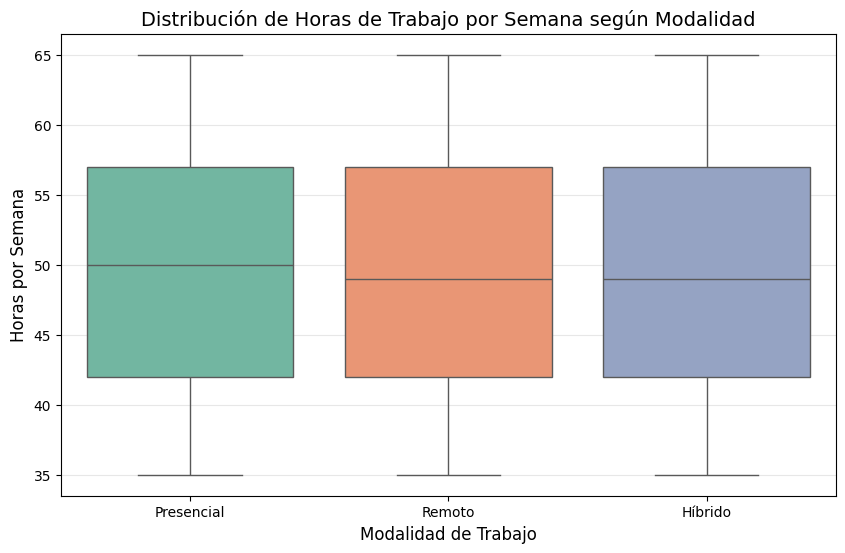

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Ubicación_de_trabajo', y='Horas_por_semana', 
            palette='Set2')
plt.title('Distribución de Horas de Trabajo por Semana según Modalidad', fontsize=14)
plt.xlabel('Modalidad de Trabajo', fontsize=12)
plt.ylabel('Horas por Semana', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

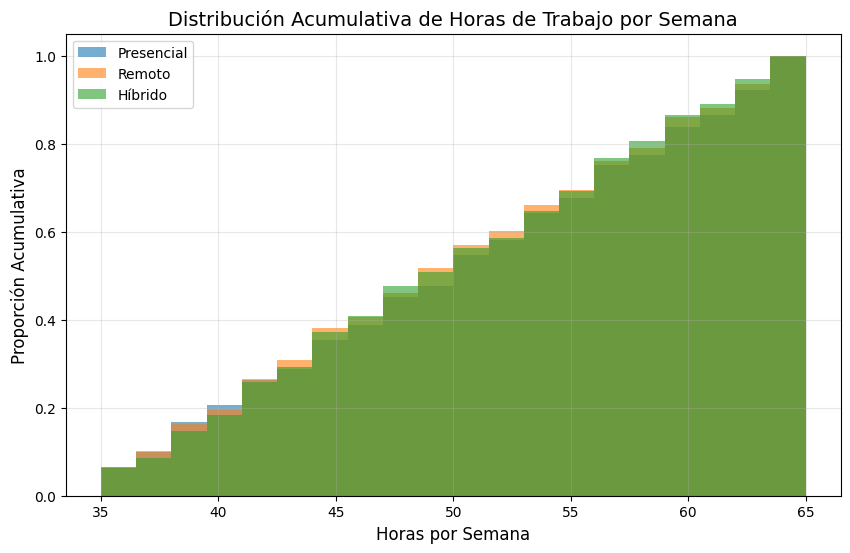

In [31]:
plt.figure(figsize=(10, 6))
for modalidad in data['Ubicación_de_trabajo'].unique():
    subset = data[data['Ubicación_de_trabajo'] == modalidad]
    plt.hist(subset['Horas_por_semana'], bins=20, alpha=0.6, 
             label=modalidad, density=True, cumulative=True)

plt.title('Distribución Acumulativa de Horas de Trabajo por Semana', fontsize=14)
plt.xlabel('Horas por Semana', fontsize=12)
plt.ylabel('Proporción Acumulativa', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()